In [1]:
import numpy as np
import seaborn as sb
import pandas
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
%matplotlib notebook

# Linear regression - one variable

Let's do a simple linear regression on the boston housing data. This includes 13 descriptors for different houses that can be used to try to predict the observed housing price.

Let's first load it and take a look at the correlation matrix:

In [9]:
iris = load_iris()
dir(iris)

['__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'clear',
 'copy',
 'fromkeys',
 'get',
 'items',
 'keys',
 'pop',
 'popitem',
 'setdefault',
 'update',
 'values']

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

<IPython.core.display.Javascript object>


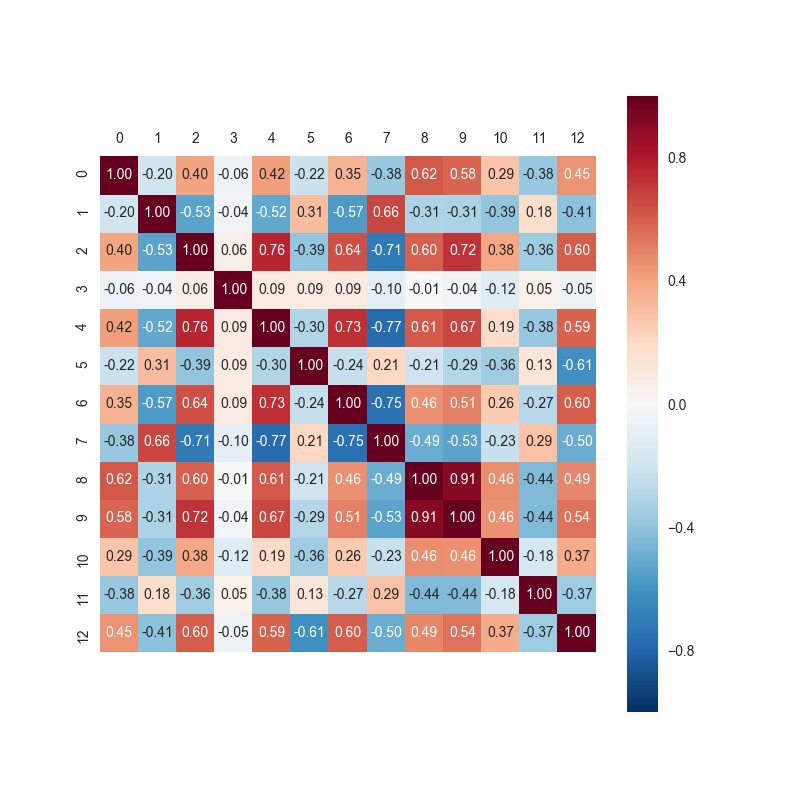

In [10]:
boston = load_boston()
print(boston.DESCR)
# get correlation matrix:
c = np.corrcoef(boston.data.T)
# use seaborn to visualize the matrix:
fig, ax = plt.subplots(figsize=(8,8)) 
sb.heatmap(c, vmin=-1., vmax=1., square=True, annot=True, fmt='.2f', ax=ax).xaxis.tick_top()

There are a LOT of descriptor correlations here. In addition, we see that the fourth descriptor is very only weakly correlated with anything. Let's take a closer look:

<IPython.core.display.Javascript object>


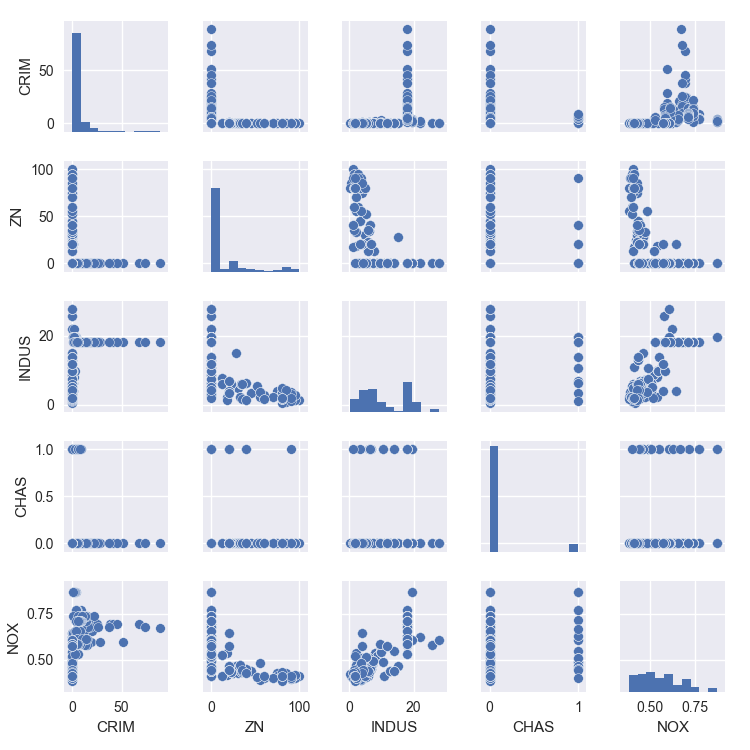

In [11]:
sb.pairplot(pandas.DataFrame(boston.data[:,0:5],columns=boston.feature_names[0:5]),size=1.5)

Ouch. Descriptor "CHAS" is actually a categorical variable! In addition, we see that other factors (such as "CRIM") have very skewed distributions. This is certainly a challenging dataset! 

So, let's take one of the features and let's try to predict `boston.target`, i.e., the housing prices from it with a linear model:

<IPython.core.display.Javascript object>


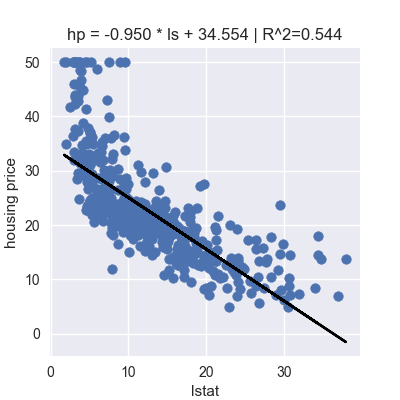

In [12]:
# one variable from the housing data - since we only have one feature, we need to
# reshape the data, so that LinearRegression properly fits!
lstat = boston.data[:,-1].reshape(-1,1)
# do the fitting 
lr = LinearRegression().fit(lstat,boston.target)
# plot the results
fig, ax = plt.subplots(figsize=(4,4))
plt.scatter(lstat,boston.target)
# use predict to conveniently plot the line!
plt.plot(lstat,lr.predict(lstat),'k')
plt.xlabel('lstat')
plt.ylabel('housing price')
# equation of the line and explained r^2 in title
plt.title('hp = {:.3f} * ls + {:.3f} | R^2={:.3f}'.format(lr.coef_[0],lr.intercept_,lr.score(lstat,boston.target)))


So, we can see that there seems to be a good predictability from "LSTAT", that is, the number of lower status households in a neighborhood. We can also see that

* there seems to be a cap to housing prices at $50K, providing a potentially problematic ceiling
* the relationship between "LSTAT" and housing price may actually be non-linear!


To address the second point, let's do something very simple. Let's transform our "LSTAT" variable logarithmically. A logarithmic transform is useful if the distribution of the variable is skewed!

<IPython.core.display.Javascript object>


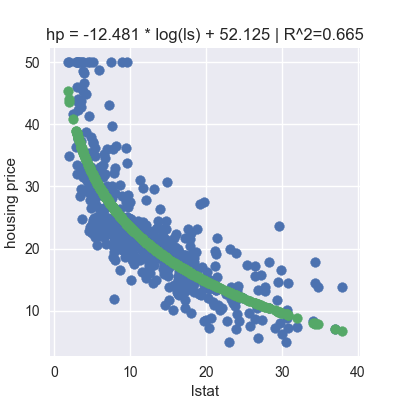

In [13]:
# one variable from the housing data - since we only have one feature, we need to
# reshape the data, so that LinearRegression properly fits!
lstat = boston.data[:,-1].reshape(-1,1)
# do the fitting 
lr = LinearRegression().fit(np.log(lstat),boston.target)
# plot the results
fig, ax = plt.subplots(figsize=(4,4))
plt.scatter(lstat,boston.target)
# use predict to conveniently plot the line!
plt.scatter(lstat,lr.predict(np.log(lstat)))
plt.xlabel('lstat')
plt.ylabel('housing price')
# equation of the line and explained r^2 in title
plt.title('hp = {:.3f} * log(ls) + {:.3f} | R^2={:.3f}'.format(lr.coef_[0],lr.intercept_,lr.score(np.log(lstat),boston.target)))

Aha - that gave us a comfortable boost in $R^2$! Nice!

Let's try to see what the log did to our data distribution. To measure the skewedness of the distribution mathematically, we are going to use the skewedness measure (who would have thunk it!):

$\gamma = \frac{\frac{1}{n}\sum_{i=1}^{n} (x_i - \bar{x})^3}{\sqrt{\frac{1}{n-1}\sum_{i=1}^{n} (x_i - \bar{x})^3}}$

This is the third standardized moment of a distribution (with the first two moments being "0" and "1" by definition, and the fourth being the kurtosis).

`numpy` does not have skew as a function, so we are going to resort to `pandas`. We could have also used `scipy` for this...

<IPython.core.display.Javascript object>


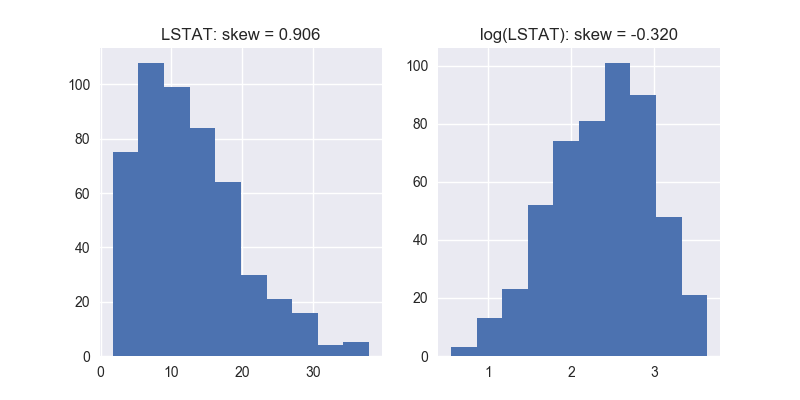

In [14]:
fig=plt.figure(figsize=(8,4))
fig.add_subplot(121)
# plot histogram
plt.hist(lstat)
# convert to pandas DataFrame, so we have access to skew
tmp=pandas.DataFrame(lstat)
plt.title('LSTAT: skew = {:.3f}'.format(tmp.skew()[0]))
fig.add_subplot(122)
# plot histogram for log data
plt.hist(np.log(lstat))
tmp=pandas.DataFrame(np.log(lstat))
plt.title('log(LSTAT): skew = {:.3f}'.format(tmp.skew()[0]))
plt.show()


So, that seemed to have helped a little with the symmetry. 

But what about the house prices? They may be skewed, too:

<IPython.core.display.Javascript object>


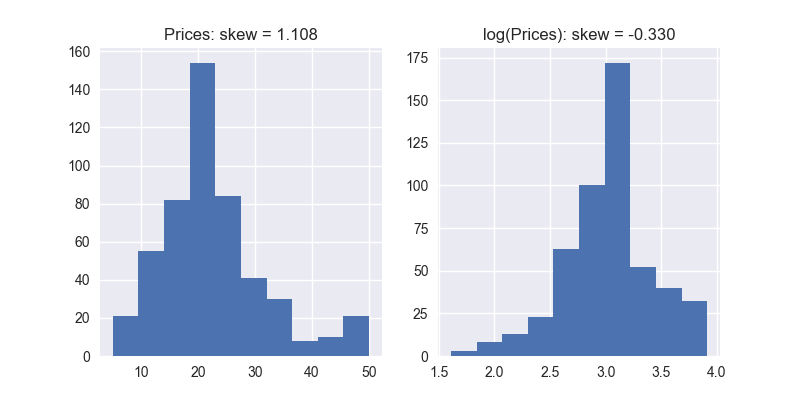

In [15]:
fig=plt.figure(figsize=(8,4))
fig.add_subplot(121)
plt.hist(boston.target)
tmp=pandas.DataFrame(boston.target)
plt.title('Prices: skew = {:.3f}'.format(tmp.skew()[0]))
fig.add_subplot(122)
plt.hist(np.log(boston.target))
tmp=pandas.DataFrame(np.log(boston.target))
plt.title('log(Prices): skew = {:.3f}'.format(tmp.skew()[0]))
plt.show()


They seem to be! So let's do a log-log fit! Let's transform both values logarithmically and then fit a line...

<IPython.core.display.Javascript object>


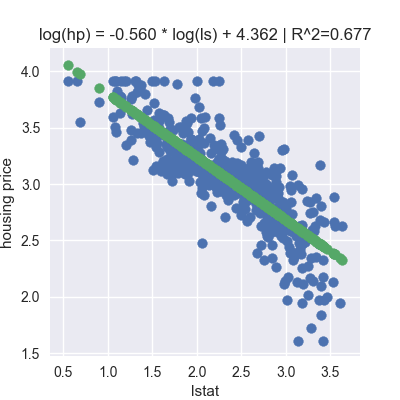

In [16]:
# one variable from the housing data - since we only have one feature, we need to
# reshape the data, so that LinearRegression properly fits!
lstat = boston.data[:,-1].reshape(-1,1)
# do the log-log fitting 
lr = LinearRegression().fit(np.log(lstat),np.log(boston.target))
# plot the results
fig, ax = plt.subplots(figsize=(4,4))
plt.scatter(np.log(lstat),np.log(boston.target))
# use predict to conveniently plot the line!
plt.scatter(np.log(lstat),lr.predict(np.log(lstat)))
plt.xlabel('lstat')
plt.ylabel('housing price')
# equation of the line and explained r^2 in title
plt.title('log(hp) = {:.3f} * log(ls) + {:.3f} | R^2={:.3f}'.format(lr.coef_[0],lr.intercept_,lr.score(np.log(lstat),np.log(boston.target))))


So that had another (albeit smaller) boost for $R^2$. 

But is this really a robust increase? Maybe fiddling too much with the data will at some point have adverse effects!

We would be able answer this question, if we try to repeat the same things using separate training- and test-sets for the data - see later!

In [21]:
for el in range(len(boston.feature_names)):
    lstat = boston.data[:,el].reshape(-1,1)
    # do the fitting 
    lr = LinearRegression().fit(lstat,boston.target)
    print(str(el) + str(lr.score(np.log(lstat),np.log(boston.target))) + "\n")

0-2724.59348632



ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

## DIY: $R^2$ competition

Find out which **untransformed** variable has the best explainability in terms of $R^2$-value!

In [ ]:
# go through all variables

    # fit current variable with boston.target

    # put r^2-value in a list
    
# find maximum index of that list and print out winning feature

# Multivariate linear regression

Now, let's try to build a multivariate linear model. We can do this in the exact same way in `scikit`, simply by putting in our multidimensional samples:

<IPython.core.display.Javascript object>


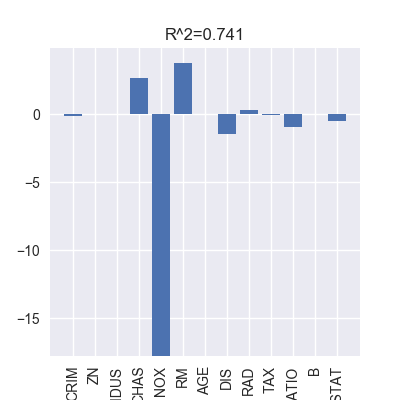

In [22]:
# make full model
lr = LinearRegression().fit(boston.data,boston.target)
# plot the coefficients of the linear fit (13 of them)
fig, ax = plt.subplots(figsize=(4,4))
plt.bar(range(13),lr.coef_)
plt.xticks(range(13),boston.feature_names,rotation='vertical')
plt.title('R^2={:.3f}'.format(lr.score(boston.data,boston.target)))

We observe that the $R^2$-value is much higher now (at 0.74), meaning that the additional variables help in increasing the linear predictability of the house prices.

But is that really surprising? I mean after all instead of giving the algorithm two features (including the intercept) to predict a value, we are now giving it 14! So we have a **lot** more power. In fact, this power may also cause problems, as we are perhaps doing too much. 

## Adjusted $R^2$

People have therefore come up with a way to correct the $R^2$-value depending on the number of feature dimensions:

$R^2_{adj} = R^2 - \frac{p}{n-p-1}(1-R^2)$ with $p$ being number of feature dimensions and $n$ being the number of samples.

In our case, $R^2_{adj} = 0.734$, which is only a little lower since we do have a lot samples ($n>>p$)!

## Importance of one feature

Also, apparently Nitric Oxides ("NOX") have a **huge** negative effect on housing prices. Or do they? 

## DIY: improve the interpretability of the linear regression

We can do this very easily, namely by...

<IPython.core.display.Javascript object>


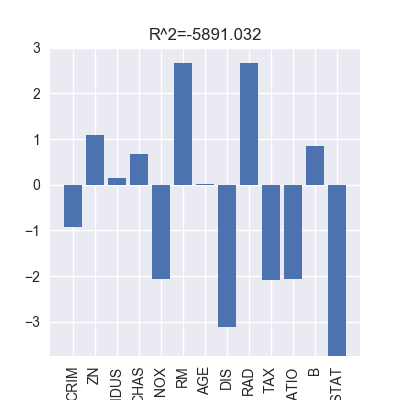

In [33]:
# implement the fix to improve interpretability
lr = LinearRegression().fit((boston.data-boston.data.mean(axis=0))/boston.data.std(axis=0),boston.target) #do normalize!! (not implemented here)
#
#
fig, ax = plt.subplots(figsize=(4,4))
plt.bar(range(13),lr.coef_)
plt.xticks(range(13),boston.feature_names,rotation='vertical')
plt.title('R^2={:.3f}'.format(lr.score(boston.data,boston.target)))

# Ridge regression

Let's revisit the housing data with ridge regression. The implementation in `scikit` uses the name `alpha` for what we called $\lambda$ as the influence parameter. We will give this a nice range to see what happens.

<IPython.core.display.Javascript object>


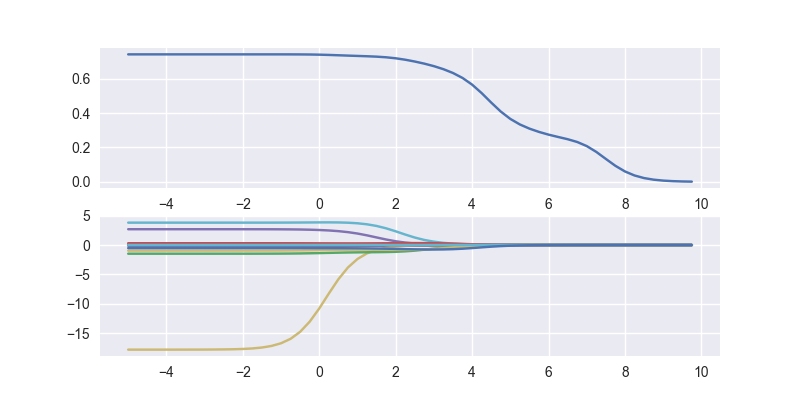

In [34]:
from sklearn.linear_model import Ridge

data = boston.data
target = boston.target

# set range of alphas
alphas = np.power(10,np.arange(-5,10,0.25))

# array for holding the r^2 values
r2s = np.zeros_like(alphas)

coefs = []

# go through all alphas
for idx,alpha in enumerate(alphas):
    # do the ridge regression and record r^2
    rr = Ridge(alpha = alpha).fit(data,target)
    r2s[idx]=rr.score(data,target)
    coefs.append(rr.coef_)
    
# plot the r^2-values of the ridge regression fit
fig, ax = plt.subplots(2,1,figsize=(8,4))
plt.subplot(2,1,1)
plt.plot(np.arange(-5,10,0.25),r2s)
plt.subplot(2,1,2)
plt.plot(np.arange(-5,10,0.25),coefs)

Well, as we can see, we can see nothing. The housing data does not benefit whatsoever from doing the ridge regression. The $R^2$-values decrease as we increase `alpha`.

That is weird.

## Evaluating model quality properly

Let's try to get back to the idea of splitting our data into training and test sets. If we only use part of the data for training, and another part for testing, we can use several of such splits to evaluate how good the algorithms can **generalize** from training to testing. 

So, in the following, we train our linear regression and ridge regression models in this way. For each `alpha`-value, we run multiple splits of our big dataset into smaller datasets. We train the regressors on the training set and evaluate their performance on the test set, averaging over the multiple splits in each case.

Let's see how this works:

<IPython.core.display.Javascript object>


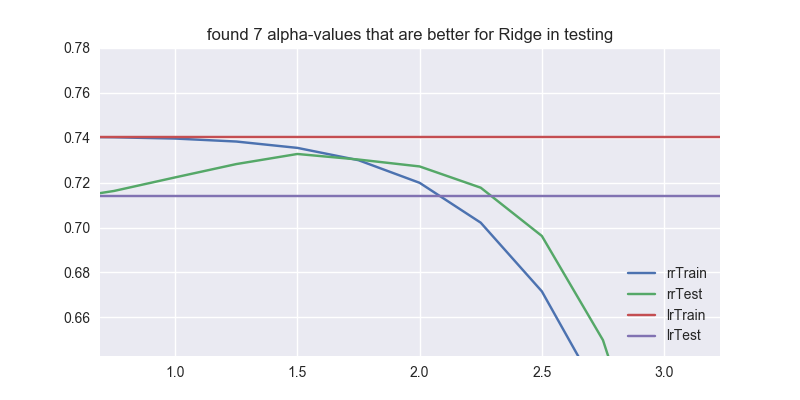

In [37]:
from sklearn.linear_model import Ridge

def testBostonRidge(data,target,numtrain=250,numShuffle = 20, mode = 'r2'):
    # set range of alphas
    exps = np.arange(-5,5,0.25)
    alphas = np.power(10,exps)

    # array for holding the r^2 values
    r2s_train = np.zeros((numShuffle,alphas.size))
    r2s_test = np.zeros((numShuffle,alphas.size))
    lr2s_train = np.zeros((numShuffle,alphas.size))
    lr2s_test = np.zeros((numShuffle,alphas.size))


    for it in range(0,numShuffle):
        randIdx = np.arange(0,target.size)
        np.random.shuffle(randIdx)
        trainIdx = randIdx[:numtrain]
        testIdx = randIdx[numtrain:]
        # go through all alphas
        for idx,alpha in enumerate(alphas):
            if mode=='r2':
                # do the ridge regression and record r^2
                # ATTENTION: r^2 can and will be negative sometimes!!
                rr = Ridge(alpha = alpha).fit(data[trainIdx,:],target[trainIdx])
                r2s_train[it,idx]=rr.score(data[trainIdx,:],target[trainIdx])
                r2s_test[it,idx]=rr.score(data[testIdx,:],target[testIdx])
                lr = LinearRegression().fit(data[trainIdx,:],target[trainIdx])
                lr2s_train[it,idx]=lr.score(data[trainIdx,:],target[trainIdx])
                lr2s_test[it,idx]=lr.score(data[testIdx,:],target[testIdx])
            else:
                # do the ridge regression and record mse
                # NOTE: MSE is always positive, but a less good measure of generalization
                rr = Ridge(alpha = alpha).fit(data[trainIdx,:],target[trainIdx])
                r2s_train[it,idx]=np.sum((rr.predict(data[trainIdx,:])-target[trainIdx])**2)/len(trainIdx)
                r2s_test[it,idx]=np.sum((rr.predict(data[testIdx,:])-target[testIdx])**2)/len(testIdx)
                lr = LinearRegression().fit(data[trainIdx,:],target[trainIdx])
                lr2s_train[it,idx]=np.sum((lr.predict(data[trainIdx,:])-target[trainIdx])**2)/len(trainIdx)
                lr2s_test[it,idx]=np.sum((lr.predict(data[testIdx,:])-target[testIdx])**2)/len(testIdx)

    # plot the r^2-values of the ridge regression fit
    fig, ax = plt.subplots(figsize=(8,4))
    plt.plot(exps,np.median(r2s_train,axis=0),label='rrTrain')
    plt.plot(exps,np.median(r2s_test,axis=0),label='rrTest')
    plt.plot(exps,np.median(lr2s_train,axis=0),label='lrTrain')
    plt.plot(exps,np.median(lr2s_test,axis=0),label='lrTest')
    plt.legend(loc='best')
    if mode == 'r2':
        plt.title('found {:d} alpha-values that are better for Ridge in testing'.format(np.size(np.where(np.median(r2s_test,axis=0)>np.median(lr2s_test,axis=0)))))
    else:
        plt.title('found {:d} alpha-values that are better for Ridge in testing'.format(np.size(np.where(np.median(r2s_test,axis=0)<np.median(lr2s_test,axis=0)))))

boston = load_boston()    
data = boston.data
target = boston.target
# normalization is necessary for ridge regression, since the 
# weight penalties are NOT scale-invariant
data = (data-data.mean(axis=0))/data.std(axis=0)
testBostonRidge(data,target,500,100,'r2')


There we go!

Now the ridge regression beats out linear regression **on the test set** for certain values of alpha. 

In addition, we see clearly that performance on the test set is **worse** than on the training set. This is the problem of generalization!

By changing the code, we can also see that more training data makes the two algorithms more and more similar. In addition, training and testing performance pull together.

## More feature engineering

Now let's go for non-linear features. One easy way to make a new feature is to simply calculate a non-linear function of an existing feature and add it to your data. Of course, this is not without danger, since you could easily overfit, but for now, we can try to see where we get.

For the beginning, let's do multiplicative pairwise combinations of all 13 housing features we have in the data. This will be (13 choose 2) = 91 different combinations that we can make. So we add them to our data:

In [38]:
bostonExt = load_boston()
for i in range(13):
    for j in range(i,13):
        newCol = boston.data[:,i]*boston.data[:,j]
        bostonExt.data = np.c_[bostonExt.data,newCol]
print(np.shape(bostonExt.data))

# normalization is necessary for ridge regression, since the 
# weight penalties are NOT scale-invariant
bostonExt.data = (bostonExt.data-bostonExt.data.mean(axis=0))/bostonExt.data.std(axis=0)

(506, 104)


Let's test our new dataset. Since we now have over 100 features, we better take care to train on more data!!

In [39]:
testBostonRidge(bostonExt.data,bostonExt.target,350,100,'r2')

<IPython.core.display.Javascript object>

# LASSO regression

Now let's try to use LASSO regression, which optimizes an L1-penalized cost function:

$\sum (x_i - \sum w_j a_j)^2 + \lambda \sum |w_i|$

This cost function is supposed to lead to coefficients that are zero. Let's first use it on the original housing data:

In [ ]:
from sklearn.linear_model import Lasso

def testBostonLASSO(data,target,numtrain=250,numShuffle = 20, mode = 'r2'):
    # set range of alphas
    exps = np.arange(-5,5,0.25)
    alphas = np.power(10,exps)

    # array for holding the r^2 values
    lars2s_train = np.zeros((numShuffle,alphas.size))
    lars2s_test = np.zeros((numShuffle,alphas.size))
    r2s_train = np.zeros((numShuffle,alphas.size))
    r2s_test = np.zeros((numShuffle,alphas.size))
    lr2s_train = np.zeros((numShuffle,alphas.size))
    lr2s_test = np.zeros((numShuffle,alphas.size))


    for it in range(0,numShuffle):
        randIdx = np.arange(0,target.size)
        np.random.shuffle(randIdx)
        trainIdx = randIdx[:numTrain]
        testIdx = randIdx[numTrain:]
        # go through all alphas
        for idx,alpha in enumerate(alphas):
            if mode=='r2':
                # do the ridge regression and record r^2
                # ATTENTION: r^2 can and will be negative sometimes!!
                lars = Lasso(alpha = alpha).fit(data[trainIdx,:],target[trainIdx])
                lars2s_train[it,idx]=lars.score(data[trainIdx,:],target[trainIdx])
                lars2s_test[it,idx]=lars.score(data[testIdx,:],target[testIdx])

                lr = LinearRegression().fit(data[trainIdx,:],target[trainIdx])
                lr2s_train[it,idx]=lr.score(data[trainIdx,:],target[trainIdx])
                lr2s_test[it,idx]=lr.score(data[testIdx,:],target[testIdx])
            else:
                # do the ridge regression and record mse
                # NOTE: MSE is always positive, but a less good measure of generalization
                lars = Lasso(alpha = alpha).fit(data[trainIdx,:],target[trainIdx])
                lars2s_train[it,idx]=np.sum((lars.predict(data[trainIdx,:])-target[trainIdx])**2)/len(trainIdx)
                lars2s_test[it,idx]=np.sum((lars.predict(data[testIdx,:])-target[testIdx])**2)/len(testIdx)

                lr = LinearRegression().fit(data[trainIdx,:],target[trainIdx])
                lr2s_train[it,idx]=np.sum((lr.predict(data[trainIdx,:])-target[trainIdx])**2)/len(trainIdx)
                lr2s_test[it,idx]=np.sum((lr.predict(data[testIdx,:])-target[testIdx])**2)/len(testIdx)

    # plot the r^2-values of the ridge regression fit
    fig, ax = plt.subplots(figsize=(8,4))
    plt.plot(exps,np.median(lars2s_train,axis=0),label='larsTrain')
    plt.plot(exps,np.median(lars2s_test,axis=0),label='larsTest')
    plt.plot(exps,np.median(lr2s_train,axis=0),label='lrTrain')
    plt.plot(exps,np.median(lr2s_test,axis=0),label='lrTest')
    plt.legend(loc='best')
    
boston = load_boston()    
data = boston.data
target = boston.target
# normalization is necessary for ridge regression, since the 
# weight penalties are NOT scale-invariant
data = (data-data.mean(axis=0))/data.std(axis=0)
testBostonLASSO(data,target,450,100,'r2')


As we can see, depending on the number of training data and repetitions, we can get a few higher $R^2$ values.

Let's look at the coefficients $w_i$ for the original and extended housing datasets for standard linear regression, ridge regression, and LASSO:

In [ ]:
def loadData(ext=False):
    d = load_boston()
    if (ext):       
        for i in range(13):
            for j in range(i,13):
                newCol = d.data[:,i]*d.data[:,j]
                d.data = np.c_[d.data,newCol]
                tmp = d.feature_names[i]+d.feature_names[j]
                d.feature_names=np.append(d.feature_names,tmp)
        print(np.shape(d.data))

    # normalization is necessary for ridge regression, since the 
    # weight penalties are NOT scale-invariant
    d.data = (d.data-d.data.mean(axis=0))/d.data.std(axis=0)
    return d

da = loadData(True)

la = Lasso(alpha = 0.5).fit(da.data,da.target)
lr = LinearRegression().fit(da.data,da.target)
rr = Ridge(alpha = 0.5).fit(da.data,da.target)

fig,ax = plt.subplots(figsize=(8,4))
plt.plot(la.coef_,label='LASSO {:.3f}'.format(la.score(da.data,da.target)))
plt.plot(rr.coef_,label='Ridge {:.3f}'.format(rr.score(da.data,da.target)))
plt.plot(lr.coef_,label='LLS {:.3f}'.format(lr.score(da.data,da.target)))
plt.legend(loc='best')
plt.show()

print(da.feature_names[np.abs(la.coef_)>0.001])

As we can see, for the small dataset there are no big differences. By increasing alpha, we can force ridge to decrease the coefficients compared to linear regression, and we can force LASSO to select only a few features.

For the large housing dataset, only a few features (combinations of features) are selected by LASSO. 

Note, that in all cases the additional penalties come at the "price" of decreasing $R^2$ on the data. However, it is important to realize that we **didn't do validation on separate training and testing sets** to get a better estimate of the model generalizability.

Let's take a look at this in more detail now:


# Cross-validation

`sklearn` has several helper functions that can be used to implement (nested) cross-validation and to select holdout datasets. In addition, it has helper functions that allow you to do grid searches for several parameters.

The following script is adapted from the `sklearn` example page and compares nested and non-nested cross-validation errors for some datasets"

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.linear_model import Lasso, Ridge, LinearRegression
# this code imports some necessary stuff for displaying the progress bar
# in order to view the progress bar, jupyter needs to enable the javascript
# you can enable this in the command line with the following command:
#
# jupyter nbextension enable --py --sys-prefix widgetsnbextension
#
# after this, you will have to restart the jupyter notebook!
from ipywidgets import FloatProgress
from IPython.display import display

# number of repetitions of hold-out
numReps = 30

# load boston
boston = load_boston()
X = boston.data
y = boston.target
    
X = (X-X.mean(axis=0))/X.std(axis=0)

# set up possible values of parameters to optimize over
# this is a dictionary of parameter names and a list of
# parameter values
pGrid = {"alpha": [0.001, 0.01, 0.05, 0.1, 1, 2, 5, 10]}

# initialize the ridge regressor for later
rr = Ridge()

# here we store the two types of R^2 values for nested
# and non-nested cross-validation
nonNestedScores = np.zeros(numReps)
nestedScores = np.zeros(numReps)

# init progress bar
f = FloatProgress(min=0, max=numReps)
display(f)
    
# loop for each repetition
for i in range(numReps):

    # let's select the cross-validation technique for the inner
    # and the outer loops - here we do KFold with 10 splits
    # we could do "StratifiedKFold" (stratification), 
    #             "LeaveOneOut" (more costly)
    
    # the KFold uses shuffling as well and we pass standard random states
    # so the same data folds will be selected if you execute the code
    # several times!
    innerCV = KFold(n_splits=4, shuffle=True, random_state=i)
    outerCV = KFold(n_splits=10, shuffle=True, random_state=i)

    # here we use the inner cross-validation loop to implement
    # a grid search over all parameters
    clf = GridSearchCV(estimator=rr, param_grid=pGrid, cv=innerCV)
    # fit the classifier to the data using cross-validation
    clf.fit(X, y)
    # select the best model for all parameters from the list and store
    nonNestedScores[i] = clf.best_score_
    # now run the outer loop in which we split again to average the
    # optimally-selected model from the inner loop across the outer
    # cross-validation splits:
    nestedScore = cross_val_score(clf, X=X, y=y, cv=outerCV)
    # the resulting mean is a better estimate of the generalizability 
    # of the optimally-selected model:
    nestedScores[i] = nestedScore.mean()
    
    # update progress bar
    f.value+=1

# what is the difference between the two cross-validation loops?
scoreDifference = nonNestedScores - nestedScores

print("Average difference of {0:6f} with std. dev. of {1:6f}."
      .format(scoreDifference.mean(), scoreDifference.std()))

# plot scores of nested and non-nested cross-validation in a violin plot
# if zero is in the interval, this means that they do not give vastly
# different results
plt.figure()
sb.violinplot(scoreDifference,orient="v")
plt.ylabel('Score Difference')
plt.show()

As we can see, the score distribution is slightly above 0, meaning that the best score selected in the inner loop is a too opimistic estimate!

In [ ]:
clf.best_params_